In [29]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
with open('preprocessed_data2.pickle','rb') as fr:
    data = pickle.load(fr)
print(data)

{'1-heptanol': {0:        Ids (A)_SAA   Ids (A)_PAS   Ids (A)_PVB  Ids (A)_PVA    Ids (A)_PC  \
0     1.506200e-07  6.080700e-08  6.080700e-08     0.000028  2.332500e-08   
1     1.500970e-07  6.098600e-08  6.098600e-08     0.000028  2.331700e-08   
2     1.461190e-07  6.068800e-08  6.068800e-08     0.000028  2.328300e-08   
3     1.497220e-07  5.966700e-08  5.966700e-08     0.000028  2.323300e-08   
4     1.514290e-07  6.177500e-08  6.177500e-08     0.000028  2.286200e-08   
...            ...           ...           ...          ...           ...   
1706  1.493700e-07  1.060560e-07  1.060560e-07     0.000037  2.256400e-08   
1707  1.486910e-07  1.096240e-07  1.096240e-07     0.000037  2.259400e-08   
1708  1.493700e-07  1.099690e-07  1.099690e-07     0.000037  2.262900e-08   
1709  1.486530e-07  1.101820e-07  1.101820e-07     0.000037  2.256600e-08   
1710  1.490750e-07  1.060320e-07  1.060320e-07     0.000037  2.256500e-08   

        Ids (A)_PS  Ids (A)_PVCA  
0     5.762500e-08  1

In [3]:
# find the sum of the trials that can be used.(센서 수가 최대인 즉 모든 실험이 있는 경우)
trial_num_list = []
scent_columns_list = list(data["1-heptanol"][0].columns)
for scent_name in data.keys():
    print(scent_name)
    print(list(data[scent_name][0].columns))
    n = data[scent_name][0].shape[1]
#     print(f"n : {n}")
    for i in data[scent_name].keys():
        present_n = data[scent_name][i].shape[1]
        if n > present_n: 
#             print(f"present n : {present_n}")
            trial_num_list.append(i)
#             print(f"sum : {trial_sum}")
            break
        print(f"trials {i}, shape {data[scent_name][i].shape}")
print(sum(trial_num_list))
print(scent_columns_list)

1-heptanol
['Ids (A)_SAA', 'Ids (A)_PAS', 'Ids (A)_PVB', 'Ids (A)_PVA', 'Ids (A)_PC', 'Ids (A)_PS', 'Ids (A)_PVCA']
trials 0, shape (1711, 7)
trials 1, shape (1653, 7)
trials 2, shape (1761, 7)
trials 3, shape (1696, 7)
trials 4, shape (1720, 7)
trials 5, shape (1685, 7)
trials 6, shape (1683, 7)
trials 7, shape (1682, 7)
trials 8, shape (1681, 7)
2-ethylfenchol
['Ids (A)_SAA', 'Ids (A)_PAS', 'Ids (A)_PVB', 'Ids (A)_PC', 'Ids (A)_PVA', 'Ids (A)_PMMA', 'Ids (A)_PS', 'Ids (A)_PVCA']
trials 0, shape (1730, 8)
trials 1, shape (1725, 8)
trials 2, shape (1719, 8)
trials 3, shape (1708, 8)
trials 4, shape (1700, 8)
trials 5, shape (1689, 8)
trials 6, shape (1682, 8)
decanal
['Ids (A)_SAA', 'Ids (A)_PAS', 'Ids (A)_PVB', 'Ids (A)_PS', 'Ids (A)_PVA', 'Ids (A)_PMMA', 'Ids (A)_PS', 'Ids (A)_PVCA', 'Ids (A)_PC', 'Ids (A)_PC.1', 'Ids (A)_PVB', 'Ids (A)_PS']
trials 0, shape (1681, 12)
trials 1, shape (1679, 12)
trials 2, shape (1694, 12)
trials 3, shape (670, 12)
trials 4, shape (1674, 12)
eugenol
['

In [4]:
for i in range(len(data.keys())):
    scent_name = list(data.keys())[i]
    print(scent_name)
    for trial in range(trial_num_list[i] - 1):
#         print(f"trials : {trial}")
        drop_list = [i for i in data[scent_name][trial].columns if i not in scent_columns_list]
#         print(f"drop list : {drop_list}")
        print(data[list(data.keys())[i]][trial].drop(columns = drop_list).shape)
        data[scent_name][trial] = data[list(data.keys())[i]][trial].drop(columns = drop_list)
        if scent_name == "decanal":
            col_list = list(data[scent_name][trial].columns)
            for columns in set([i for i in col_list if col_list.count(i) > 1]):
#                 print(f"scent name : {scent_name}, trial : {trial}, columns : {columns}")
                rep_column = data[scent_name][trial][columns].iloc[:, 0]
#                 print(f"rep column : {rep_column}")
                data[scent_name][trial].drop(columns = columns, inplace = True)
                data[scent_name][trial][columns] = rep_column
#                 print(f"결과1 : {data[scent_name][trial]}")
        data[scent_name][trial] = data[scent_name][trial][scent_columns_list]
        print(f"결과2 : {data[scent_name][trial]}")

1-heptanol
(1711, 7)
결과2 :        Ids (A)_SAA   Ids (A)_PAS   Ids (A)_PVB  Ids (A)_PVA    Ids (A)_PC  \
0     1.506200e-07  6.080700e-08  6.080700e-08     0.000028  2.332500e-08   
1     1.500970e-07  6.098600e-08  6.098600e-08     0.000028  2.331700e-08   
2     1.461190e-07  6.068800e-08  6.068800e-08     0.000028  2.328300e-08   
3     1.497220e-07  5.966700e-08  5.966700e-08     0.000028  2.323300e-08   
4     1.514290e-07  6.177500e-08  6.177500e-08     0.000028  2.286200e-08   
...            ...           ...           ...          ...           ...   
1706  1.493700e-07  1.060560e-07  1.060560e-07     0.000037  2.256400e-08   
1707  1.486910e-07  1.096240e-07  1.096240e-07     0.000037  2.259400e-08   
1708  1.493700e-07  1.099690e-07  1.099690e-07     0.000037  2.262900e-08   
1709  1.486530e-07  1.101820e-07  1.101820e-07     0.000037  2.256600e-08   
1710  1.490750e-07  1.060320e-07  1.060320e-07     0.000037  2.256500e-08   

        Ids (A)_PS  Ids (A)_PVCA  
0     5.76250

결과2 :        Ids (A)_SAA  Ids (A)_PAS   Ids (A)_PVB   Ids (A)_PVA    Ids (A)_PC  \
0     2.533750e-07     0.000001  1.927420e-07  1.042120e-07  1.570490e-07   
1     2.529550e-07     0.000001  1.926550e-07  1.041520e-07  1.570710e-07   
2     2.530440e-07     0.000001  1.929360e-07  1.043900e-07  1.572270e-07   
3     2.530340e-07     0.000001  1.926350e-07  1.041780e-07  1.570890e-07   
4     2.508940e-07     0.000001  1.927860e-07  1.042700e-07  1.557480e-07   
...            ...          ...           ...           ...           ...   
1714  2.515000e-07     0.000002  1.884820e-07  1.734520e-07  1.828770e-07   
1715  2.511030e-07     0.000002  1.886170e-07  1.735490e-07  1.849580e-07   
1716  2.517800e-07     0.000002  1.885150e-07  1.718060e-07  1.808460e-07   
1717  2.510430e-07     0.000002  1.885580e-07  1.732990e-07  1.833060e-07   
1718  2.516710e-07     0.000002  1.887700e-07  1.733760e-07  1.849170e-07   

        Ids (A)_PS  Ids (A)_PVCA  
0     1.264000e-07  2.428430e-07  

결과2 :       Ids (A)_SAA   Ids (A)_PAS   Ids (A)_PVB  Ids (A)_PVA    Ids (A)_PC  \
0    1.680840e-07  9.171200e-07  1.007500e-07     0.000012  6.866200e-08   
1    1.683140e-07  9.159100e-07  1.007800e-07     0.000012  6.886900e-08   
2    1.677350e-07  9.160700e-07  9.925600e-08     0.000012  6.882900e-08   
3    1.678090e-07  9.164900e-07  1.006500e-07     0.000012  6.877000e-08   
4    1.682760e-07  9.085100e-07  1.007090e-07     0.000012  6.832000e-08   
..            ...           ...           ...          ...           ...   
665  1.756810e-07  2.954310e-06  1.010590e-07     0.000020  6.642300e-08   
666  1.758970e-07  2.951220e-06  1.009470e-07     0.000020  6.626000e-08   
667  1.743790e-07  2.947330e-06  1.010350e-07     0.000020  6.628600e-08   
668  1.757760e-07  2.945440e-06  1.009300e-07     0.000020  6.525800e-08   
669  1.757270e-07  2.941330e-06  9.985000e-08     0.000020  6.627700e-08   

       Ids (A)_PS  Ids (A)_PVCA  
0    5.334000e-08  1.788150e-07  
1    5.770800

결과2 :        Ids (A)_SAA   Ids (A)_PAS   Ids (A)_PVB  Ids (A)_PVA    Ids (A)_PC  \
0     2.897510e-07  1.802990e-07  2.117520e-07     0.000003  1.464460e-07   
1     2.897040e-07  1.771690e-07  2.117690e-07     0.000003  1.465090e-07   
2     2.898530e-07  1.798320e-07  2.115920e-07     0.000003  1.463570e-07   
3     2.898240e-07  1.798070e-07  2.118770e-07     0.000003  1.465880e-07   
4     2.872150e-07  1.799750e-07  2.117360e-07     0.000003  1.462720e-07   
...            ...           ...           ...          ...           ...   
1704  3.122270e-07  2.827180e-07  2.097550e-07     0.000007  1.790630e-07   
1705  3.151430e-07  2.826230e-07  2.098640e-07     0.000007  1.789020e-07   
1706  3.153580e-07  2.797120e-07  2.098980e-07     0.000007  1.789720e-07   
1707  3.153860e-07  2.833160e-07  2.096310e-07     0.000007  1.788950e-07   
1708  3.150290e-07  2.831900e-07  2.071080e-07     0.000007  1.791440e-07   

        Ids (A)_PS  Ids (A)_PVCA  
0     6.466800e-08  1.166010e-07  

(1696, 7)
결과2 :        Ids (A)_SAA   Ids (A)_PAS   Ids (A)_PVB   Ids (A)_PVA    Ids (A)_PC  \
0     1.377860e-07  3.479600e-08  7.655300e-08  2.382000e-07  2.899100e-08   
1     1.373310e-07  3.489300e-08  7.657100e-08  2.383610e-07  2.916700e-08   
2     1.378450e-07  3.500300e-08  7.655400e-08  2.385140e-07  2.850100e-08   
3     1.378410e-07  3.500400e-08  7.658000e-08  2.381750e-07  2.910300e-08   
4     1.376780e-07  3.467100e-08  7.612000e-08  2.392950e-07  2.768700e-08   
...            ...           ...           ...           ...           ...   
1691  7.562900e-08  5.870600e-08  4.027600e-08  3.733540e-07  2.044600e-08   
1692  7.588000e-08  5.862200e-08  4.021400e-08  3.719580e-07  2.044600e-08   
1693  7.530600e-08  5.829300e-08  4.032800e-08  3.738350e-07  2.108100e-08   
1694  7.573400e-08  5.839300e-08  4.006100e-08  3.734710e-07  2.020900e-08   
1695  7.537800e-08  5.848900e-08  4.008900e-08  3.726950e-07  2.023400e-08   

        Ids (A)_PS  Ids (A)_PVCA  
0     4.9828

In [9]:
data

{'1-heptanol': {0:        Ids (A)_SAA   Ids (A)_PAS   Ids (A)_PVB  Ids (A)_PVA    Ids (A)_PC  \
  0     1.506200e-07  6.080700e-08  6.080700e-08     0.000028  2.332500e-08   
  1     1.500970e-07  6.098600e-08  6.098600e-08     0.000028  2.331700e-08   
  2     1.461190e-07  6.068800e-08  6.068800e-08     0.000028  2.328300e-08   
  3     1.497220e-07  5.966700e-08  5.966700e-08     0.000028  2.323300e-08   
  4     1.514290e-07  6.177500e-08  6.177500e-08     0.000028  2.286200e-08   
  ...            ...           ...           ...          ...           ...   
  1706  1.493700e-07  1.060560e-07  1.060560e-07     0.000037  2.256400e-08   
  1707  1.486910e-07  1.096240e-07  1.096240e-07     0.000037  2.259400e-08   
  1708  1.493700e-07  1.099690e-07  1.099690e-07     0.000037  2.262900e-08   
  1709  1.486530e-07  1.101820e-07  1.101820e-07     0.000037  2.256600e-08   
  1710  1.490750e-07  1.060320e-07  1.060320e-07     0.000037  2.256500e-08   
  
          Ids (A)_PS  Ids (A)_PV

In [10]:
scent_columns_list = list(data["1-heptanol"][0].columns)
for scent_name in data.keys():
    print(scent_name)
    print(list(data[scent_name][0].columns))
    n = data[scent_name][0].shape[1]
    for i in data[scent_name].keys():
        present_n = data[scent_name][i].shape[1]
        print(f"n : {n}, present n : {present_n}")
        if n != present_n: 
            break
        print(f"trials {i}, shape {data[scent_name][i].shape}")

1-heptanol
['Ids (A)_SAA', 'Ids (A)_PAS', 'Ids (A)_PVB', 'Ids (A)_PVA', 'Ids (A)_PC', 'Ids (A)_PS', 'Ids (A)_PVCA']
n : 7, present n : 7
trials 0, shape (1711, 7)
n : 7, present n : 7
trials 1, shape (1653, 7)
n : 7, present n : 7
trials 2, shape (1761, 7)
n : 7, present n : 7
trials 3, shape (1696, 7)
n : 7, present n : 7
trials 4, shape (1720, 7)
n : 7, present n : 7
trials 5, shape (1685, 7)
n : 7, present n : 7
trials 6, shape (1683, 7)
n : 7, present n : 7
trials 7, shape (1682, 7)
n : 7, present n : 7
trials 8, shape (1681, 7)
n : 7, present n : 4
2-ethylfenchol
['Ids (A)_SAA', 'Ids (A)_PAS', 'Ids (A)_PVB', 'Ids (A)_PVA', 'Ids (A)_PC', 'Ids (A)_PS', 'Ids (A)_PVCA']
n : 7, present n : 7
trials 0, shape (1730, 7)
n : 7, present n : 7
trials 1, shape (1725, 7)
n : 7, present n : 7
trials 2, shape (1719, 7)
n : 7, present n : 7
trials 3, shape (1708, 7)
n : 7, present n : 7
trials 4, shape (1700, 7)
n : 7, present n : 7
trials 5, shape (1689, 7)
n : 7, present n : 8
decanal
['Ids (A)

To make the data set which containes the same amount of array for each scent, let's read 4 trials for each.

In [77]:
a = np.array([1.14749e-07, 1.33164e-07])
print(a.min())

1.14749e-07


In [94]:
# min_max_scaler = preprocessing.MinMaxScaler()
data_array = np.zeros(shape = (3*8, 1650, 7))
label = []
scent_name = list(data.keys())
count = 0

for scent_num in range(8):
    print(scent_num)
    scent = scent_name[scent_num]
    for i in range(3):
        print(f"i : {i}, shape : {data[scent][i].shape}")
        temp = data[scent][i]
        temp = temp.to_numpy()[:1650]
        print(f"temp shape : {temp.shape}")
        label.append(scent_num)
        for j in range(7):
            temp_sensor = temp[:, j]
            temp_sensor -= temp_sensor.min()
            temp[:, j] = temp_sensor
        data_array[count] = temp
        count += 1
print(data_array)
print(label)
print(data_array.shape)

0
i : 0, shape : (1711, 7)
temp shape : (1650, 7)
i : 1, shape : (1653, 7)
temp shape : (1650, 7)
i : 2, shape : (1761, 7)
temp shape : (1650, 7)
1
i : 0, shape : (1730, 7)
temp shape : (1650, 7)
i : 1, shape : (1725, 7)
temp shape : (1650, 7)
i : 2, shape : (1719, 7)
temp shape : (1650, 7)
2
i : 0, shape : (1681, 7)
temp shape : (1650, 7)
i : 1, shape : (1679, 7)
temp shape : (1650, 7)
i : 2, shape : (1694, 7)
temp shape : (1650, 7)
3
i : 0, shape : (1713, 7)
temp shape : (1650, 7)
i : 1, shape : (1709, 7)
temp shape : (1650, 7)
i : 2, shape : (1705, 7)
temp shape : (1650, 7)
4
i : 0, shape : (1716, 7)
temp shape : (1650, 7)
i : 1, shape : (1702, 7)
temp shape : (1650, 7)
i : 2, shape : (1709, 7)
temp shape : (1650, 7)
5
i : 0, shape : (1714, 7)
temp shape : (1650, 7)
i : 1, shape : (1706, 7)
temp shape : (1650, 7)
i : 2, shape : (1697, 7)
temp shape : (1650, 7)
6
i : 0, shape : (1650, 7)
temp shape : (1650, 7)
i : 1, shape : (1677, 7)
temp shape : (1650, 7)
i : 2, shape : (1672, 7)
t

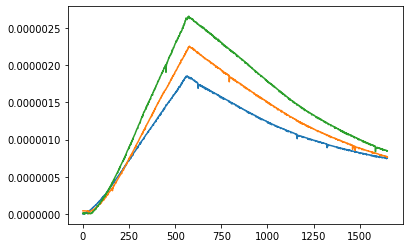

In [96]:
plt.plot(data_array[3,:,1])
plt.plot(data_array[4,:,1])
plt.plot(data_array[5,:,1])

In [97]:
X = data_array.reshape(24, -1)
# print(X)
# print(X.shape)
y = np.array(label)
y = tf.keras.utils.to_categorical(y)
# print(y)
# print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
nb_classes = 8
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
#     tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(nb_classes, activation = 'softmax'),
 ])

# model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01, momentum=0.9),
#               loss='mse',
#               metrics=['accuracy'])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=900,
                    validation_data=(X_test, y_test),
                    )

Epoch 1/900
1/1 [==============================] - 1s 1s/step - loss: 2.0794 - accuracy: 0.1053 - val_loss: 2.0811 - val_accuracy: 0.0000e+00
Epoch 2/900
1/1 [==============================] - 0s 80ms/step - loss: 2.0790 - accuracy: 0.1579 - val_loss: 2.0842 - val_accuracy: 0.0000e+00
Epoch 3/900
1/1 [==============================] - 0s 60ms/step - loss: 2.0782 - accuracy: 0.1579 - val_loss: 2.0875 - val_accuracy: 0.0000e+00
Epoch 4/900
1/1 [==============================] - 0s 66ms/step - loss: 2.0774 - accuracy: 0.1579 - val_loss: 2.0911 - val_accuracy: 0.0000e+00
Epoch 5/900
1/1 [==============================] - 0s 57ms/step - loss: 2.0765 - accuracy: 0.1579 - val_loss: 2.0951 - val_accuracy: 0.0000e+00
Epoch 6/900
1/1 [==============================] - 0s 56ms/step - loss: 2.0756 - accuracy: 0.1579 - val_loss: 2.0996 - val_accuracy: 0.0000e+00
Epoch 7/900
1/1 [==============================] - 0s 75ms/step - loss: 2.0746 - accuracy: 0.1579 - val_loss: 2.1045 - val_accuracy: 0.000

1/1 [==============================] - 0s 62ms/step - loss: 2.0490 - accuracy: 0.1579 - val_loss: 2.2493 - val_accuracy: 0.0000e+00
Epoch 58/900
1/1 [==============================] - 0s 63ms/step - loss: 2.0478 - accuracy: 0.1579 - val_loss: 2.2478 - val_accuracy: 0.0000e+00
Epoch 59/900
1/1 [==============================] - 0s 69ms/step - loss: 2.0465 - accuracy: 0.1579 - val_loss: 2.2457 - val_accuracy: 0.0000e+00
Epoch 60/900
1/1 [==============================] - 0s 61ms/step - loss: 2.0451 - accuracy: 0.1579 - val_loss: 2.2437 - val_accuracy: 0.0000e+00
Epoch 61/900
1/1 [==============================] - 0s 64ms/step - loss: 2.0435 - accuracy: 0.1579 - val_loss: 2.2424 - val_accuracy: 0.0000e+00
Epoch 62/900
1/1 [==============================] - 0s 50ms/step - loss: 2.0416 - accuracy: 0.1579 - val_loss: 2.2410 - val_accuracy: 0.0000e+00
Epoch 63/900
1/1 [==============================] - 0s 63ms/step - loss: 2.0396 - accuracy: 0.1579 - val_loss: 2.2400 - val_accuracy: 0.0000e+0

1/1 [==============================] - 0s 54ms/step - loss: 1.6846 - accuracy: 0.2632 - val_loss: 1.6097 - val_accuracy: 0.2000
Epoch 115/900
1/1 [==============================] - 0s 51ms/step - loss: 1.6759 - accuracy: 0.2632 - val_loss: 1.5989 - val_accuracy: 0.2000
Epoch 116/900
1/1 [==============================] - 0s 52ms/step - loss: 1.6666 - accuracy: 0.2632 - val_loss: 1.5854 - val_accuracy: 0.2000
Epoch 117/900
1/1 [==============================] - 0s 52ms/step - loss: 1.6578 - accuracy: 0.2632 - val_loss: 1.5716 - val_accuracy: 0.2000
Epoch 118/900
1/1 [==============================] - 0s 69ms/step - loss: 1.6495 - accuracy: 0.2632 - val_loss: 1.5625 - val_accuracy: 0.2000
Epoch 119/900
1/1 [==============================] - 0s 61ms/step - loss: 1.6411 - accuracy: 0.2632 - val_loss: 1.5513 - val_accuracy: 0.2000
Epoch 120/900
1/1 [==============================] - 0s 59ms/step - loss: 1.6330 - accuracy: 0.2632 - val_loss: 1.5422 - val_accuracy: 0.2000
Epoch 121/900
1/1 [=

Epoch 172/900
1/1 [==============================] - 0s 64ms/step - loss: 1.2942 - accuracy: 0.4737 - val_loss: 1.1828 - val_accuracy: 0.4000
Epoch 173/900
1/1 [==============================] - 0s 66ms/step - loss: 1.2904 - accuracy: 0.4737 - val_loss: 1.1792 - val_accuracy: 0.4000
Epoch 174/900
1/1 [==============================] - 0s 59ms/step - loss: 1.2868 - accuracy: 0.4737 - val_loss: 1.1803 - val_accuracy: 0.4000
Epoch 175/900
1/1 [==============================] - 0s 58ms/step - loss: 1.2844 - accuracy: 0.5789 - val_loss: 1.1726 - val_accuracy: 0.4000
Epoch 176/900
1/1 [==============================] - 0s 67ms/step - loss: 1.2804 - accuracy: 0.4737 - val_loss: 1.1697 - val_accuracy: 0.4000
Epoch 177/900
1/1 [==============================] - 0s 57ms/step - loss: 1.2771 - accuracy: 0.4737 - val_loss: 1.1703 - val_accuracy: 0.4000
Epoch 178/900
1/1 [==============================] - 0s 56ms/step - loss: 1.2745 - accuracy: 0.4737 - val_loss: 1.1624 - val_accuracy: 0.4000
Epoch 

Epoch 230/900
1/1 [==============================] - 0s 57ms/step - loss: 1.1194 - accuracy: 0.5789 - val_loss: 0.9882 - val_accuracy: 0.4000
Epoch 231/900
1/1 [==============================] - 0s 54ms/step - loss: 1.1205 - accuracy: 0.5263 - val_loss: 1.0416 - val_accuracy: 0.4000
Epoch 232/900
1/1 [==============================] - 0s 58ms/step - loss: 1.1160 - accuracy: 0.5789 - val_loss: 0.9958 - val_accuracy: 0.4000
Epoch 233/900
1/1 [==============================] - 0s 58ms/step - loss: 1.1071 - accuracy: 0.5263 - val_loss: 1.0027 - val_accuracy: 0.4000
Epoch 234/900
1/1 [==============================] - 0s 58ms/step - loss: 1.1021 - accuracy: 0.5263 - val_loss: 1.0233 - val_accuracy: 0.4000
Epoch 235/900
1/1 [==============================] - 0s 52ms/step - loss: 1.1019 - accuracy: 0.5789 - val_loss: 0.9811 - val_accuracy: 0.4000
Epoch 236/900
1/1 [==============================] - 0s 54ms/step - loss: 1.1014 - accuracy: 0.5263 - val_loss: 1.0225 - val_accuracy: 0.4000
Epoch 

1/1 [==============================] - 0s 53ms/step - loss: 0.9404 - accuracy: 0.6842 - val_loss: 0.8755 - val_accuracy: 0.4000
Epoch 288/900
1/1 [==============================] - 0s 58ms/step - loss: 0.9371 - accuracy: 0.5789 - val_loss: 0.9190 - val_accuracy: 0.4000
Epoch 289/900
1/1 [==============================] - 0s 58ms/step - loss: 0.9310 - accuracy: 0.7895 - val_loss: 0.8854 - val_accuracy: 0.4000
Epoch 290/900
1/1 [==============================] - 0s 53ms/step - loss: 0.9256 - accuracy: 0.5789 - val_loss: 0.8962 - val_accuracy: 0.4000
Epoch 291/900
1/1 [==============================] - 0s 49ms/step - loss: 0.9220 - accuracy: 0.5789 - val_loss: 0.9046 - val_accuracy: 0.4000
Epoch 292/900
1/1 [==============================] - 0s 47ms/step - loss: 0.9204 - accuracy: 0.6316 - val_loss: 0.8823 - val_accuracy: 0.4000
Epoch 293/900
1/1 [==============================] - 0s 57ms/step - loss: 0.9201 - accuracy: 0.5789 - val_loss: 0.9211 - val_accuracy: 0.4000
Epoch 294/900
1/1 [=

Epoch 345/900
1/1 [==============================] - 0s 67ms/step - loss: 0.8309 - accuracy: 0.6842 - val_loss: 0.8608 - val_accuracy: 0.4000
Epoch 346/900
1/1 [==============================] - 0s 54ms/step - loss: 0.8314 - accuracy: 0.5789 - val_loss: 0.8937 - val_accuracy: 0.4000
Epoch 347/900
1/1 [==============================] - 0s 58ms/step - loss: 0.8320 - accuracy: 0.7895 - val_loss: 0.8551 - val_accuracy: 0.4000
Epoch 348/900
1/1 [==============================] - 0s 50ms/step - loss: 0.8330 - accuracy: 0.5789 - val_loss: 0.8976 - val_accuracy: 0.4000
Epoch 349/900
1/1 [==============================] - 0s 67ms/step - loss: 0.8315 - accuracy: 0.7895 - val_loss: 0.8534 - val_accuracy: 0.4000
Epoch 350/900
1/1 [==============================] - 0s 66ms/step - loss: 0.8301 - accuracy: 0.5789 - val_loss: 0.8892 - val_accuracy: 0.4000
Epoch 351/900
1/1 [==============================] - 0s 56ms/step - loss: 0.8262 - accuracy: 0.7895 - val_loss: 0.8587 - val_accuracy: 0.4000
Epoch 

Epoch 403/900
1/1 [==============================] - 0s 65ms/step - loss: 0.7548 - accuracy: 0.7895 - val_loss: 0.8638 - val_accuracy: 0.4000
Epoch 404/900
1/1 [==============================] - 0s 59ms/step - loss: 0.7535 - accuracy: 0.7895 - val_loss: 0.8550 - val_accuracy: 0.4000
Epoch 405/900
1/1 [==============================] - 0s 63ms/step - loss: 0.7532 - accuracy: 0.7368 - val_loss: 0.8742 - val_accuracy: 0.4000
Epoch 406/900
1/1 [==============================] - 0s 50ms/step - loss: 0.7534 - accuracy: 0.7895 - val_loss: 0.8482 - val_accuracy: 0.4000
Epoch 407/900
1/1 [==============================] - 0s 60ms/step - loss: 0.7544 - accuracy: 0.6316 - val_loss: 0.8803 - val_accuracy: 0.4000
Epoch 408/900
1/1 [==============================] - 0s 63ms/step - loss: 0.7547 - accuracy: 0.7895 - val_loss: 0.8416 - val_accuracy: 0.4000
Epoch 409/900
1/1 [==============================] - 0s 61ms/step - loss: 0.7564 - accuracy: 0.6316 - val_loss: 0.8827 - val_accuracy: 0.4000
Epoch 

Epoch 461/900
1/1 [==============================] - 0s 61ms/step - loss: 0.6775 - accuracy: 0.7368 - val_loss: 0.8368 - val_accuracy: 0.6000
Epoch 462/900
1/1 [==============================] - 0s 53ms/step - loss: 0.6817 - accuracy: 0.7368 - val_loss: 0.8789 - val_accuracy: 0.6000
Epoch 463/900
1/1 [==============================] - 0s 51ms/step - loss: 0.6847 - accuracy: 0.7895 - val_loss: 0.8405 - val_accuracy: 0.4000
Epoch 464/900
1/1 [==============================] - 0s 62ms/step - loss: 0.6873 - accuracy: 0.7368 - val_loss: 0.8844 - val_accuracy: 0.4000
Epoch 465/900
1/1 [==============================] - 0s 54ms/step - loss: 0.6827 - accuracy: 0.7895 - val_loss: 0.8428 - val_accuracy: 0.4000
Epoch 466/900
1/1 [==============================] - 0s 56ms/step - loss: 0.6765 - accuracy: 0.7368 - val_loss: 0.8621 - val_accuracy: 0.4000
Epoch 467/900
1/1 [==============================] - 0s 65ms/step - loss: 0.6689 - accuracy: 0.7368 - val_loss: 0.8538 - val_accuracy: 0.4000
Epoch 

1/1 [==============================] - 0s 58ms/step - loss: 0.6060 - accuracy: 0.7368 - val_loss: 0.8364 - val_accuracy: 0.6000
Epoch 519/900
1/1 [==============================] - 0s 62ms/step - loss: 0.6061 - accuracy: 0.7368 - val_loss: 0.8149 - val_accuracy: 0.6000
Epoch 520/900
1/1 [==============================] - 0s 67ms/step - loss: 0.6064 - accuracy: 0.7368 - val_loss: 0.8395 - val_accuracy: 0.6000
Epoch 521/900
1/1 [==============================] - 0s 58ms/step - loss: 0.6064 - accuracy: 0.7368 - val_loss: 0.8115 - val_accuracy: 0.6000
Epoch 522/900
1/1 [==============================] - 0s 61ms/step - loss: 0.6061 - accuracy: 0.7368 - val_loss: 0.8389 - val_accuracy: 0.6000
Epoch 523/900
1/1 [==============================] - 0s 55ms/step - loss: 0.6049 - accuracy: 0.7368 - val_loss: 0.8104 - val_accuracy: 0.6000
Epoch 524/900
1/1 [==============================] - 0s 57ms/step - loss: 0.6035 - accuracy: 0.7368 - val_loss: 0.8350 - val_accuracy: 0.6000
Epoch 525/900
1/1 [=

Epoch 576/900
1/1 [==============================] - 0s 66ms/step - loss: 0.5580 - accuracy: 0.7368 - val_loss: 0.7940 - val_accuracy: 0.6000
Epoch 577/900
1/1 [==============================] - 0s 66ms/step - loss: 0.5568 - accuracy: 0.7368 - val_loss: 0.8050 - val_accuracy: 0.6000
Epoch 578/900
1/1 [==============================] - 0s 67ms/step - loss: 0.5554 - accuracy: 0.7895 - val_loss: 0.7953 - val_accuracy: 0.6000
Epoch 579/900
1/1 [==============================] - 0s 60ms/step - loss: 0.5543 - accuracy: 0.7368 - val_loss: 0.7967 - val_accuracy: 0.6000
Epoch 580/900
1/1 [==============================] - 0s 64ms/step - loss: 0.5535 - accuracy: 0.7895 - val_loss: 0.8004 - val_accuracy: 0.6000
Epoch 581/900
1/1 [==============================] - 0s 64ms/step - loss: 0.5530 - accuracy: 0.7368 - val_loss: 0.7936 - val_accuracy: 0.6000
Epoch 582/900
1/1 [==============================] - 0s 65ms/step - loss: 0.5527 - accuracy: 0.7368 - val_loss: 0.8043 - val_accuracy: 0.6000
Epoch 

Epoch 634/900
1/1 [==============================] - 0s 66ms/step - loss: 0.5238 - accuracy: 0.7895 - val_loss: 0.7677 - val_accuracy: 0.6000
Epoch 635/900
1/1 [==============================] - 0s 62ms/step - loss: 0.5230 - accuracy: 0.7895 - val_loss: 0.7570 - val_accuracy: 0.6000
Epoch 636/900
1/1 [==============================] - 0s 58ms/step - loss: 0.5245 - accuracy: 0.7368 - val_loss: 0.7873 - val_accuracy: 0.6000
Epoch 637/900
1/1 [==============================] - 0s 52ms/step - loss: 0.5269 - accuracy: 0.7368 - val_loss: 0.7509 - val_accuracy: 0.6000
Epoch 638/900
1/1 [==============================] - 0s 58ms/step - loss: 0.5293 - accuracy: 0.7368 - val_loss: 0.7929 - val_accuracy: 0.6000
Epoch 639/900
1/1 [==============================] - 0s 57ms/step - loss: 0.5304 - accuracy: 0.7368 - val_loss: 0.7421 - val_accuracy: 0.6000
Epoch 640/900
1/1 [==============================] - 0s 48ms/step - loss: 0.5301 - accuracy: 0.7368 - val_loss: 0.7803 - val_accuracy: 0.6000
Epoch 

Epoch 692/900
1/1 [==============================] - 0s 55ms/step - loss: 0.5000 - accuracy: 0.7368 - val_loss: 0.7440 - val_accuracy: 0.6000
Epoch 693/900
1/1 [==============================] - 0s 50ms/step - loss: 0.4992 - accuracy: 0.7895 - val_loss: 0.7227 - val_accuracy: 0.6000
Epoch 694/900
1/1 [==============================] - 0s 47ms/step - loss: 0.4985 - accuracy: 0.7895 - val_loss: 0.7425 - val_accuracy: 0.6000
Epoch 695/900
1/1 [==============================] - 0s 45ms/step - loss: 0.4977 - accuracy: 0.7895 - val_loss: 0.7271 - val_accuracy: 0.6000
Epoch 696/900
1/1 [==============================] - 0s 47ms/step - loss: 0.4970 - accuracy: 0.7895 - val_loss: 0.7414 - val_accuracy: 0.6000
Epoch 697/900
1/1 [==============================] - 0s 49ms/step - loss: 0.4963 - accuracy: 0.7895 - val_loss: 0.7297 - val_accuracy: 0.6000
Epoch 698/900
1/1 [==============================] - 0s 48ms/step - loss: 0.4957 - accuracy: 0.7895 - val_loss: 0.7390 - val_accuracy: 0.6000
Epoch 

Epoch 750/900
1/1 [==============================] - 0s 54ms/step - loss: 0.4781 - accuracy: 0.7895 - val_loss: 0.7034 - val_accuracy: 0.6000
Epoch 751/900
1/1 [==============================] - 0s 62ms/step - loss: 0.4781 - accuracy: 0.7895 - val_loss: 0.7290 - val_accuracy: 0.6000
Epoch 752/900
1/1 [==============================] - 0s 57ms/step - loss: 0.4769 - accuracy: 0.7895 - val_loss: 0.7149 - val_accuracy: 0.6000
Epoch 753/900
1/1 [==============================] - 0s 59ms/step - loss: 0.4756 - accuracy: 0.7895 - val_loss: 0.7170 - val_accuracy: 0.6000
Epoch 754/900
1/1 [==============================] - 0s 59ms/step - loss: 0.4748 - accuracy: 0.7895 - val_loss: 0.7162 - val_accuracy: 0.6000
Epoch 755/900
1/1 [==============================] - 0s 62ms/step - loss: 0.4748 - accuracy: 0.7895 - val_loss: 0.6987 - val_accuracy: 0.6000
Epoch 756/900
1/1 [==============================] - 0s 65ms/step - loss: 0.4753 - accuracy: 0.7895 - val_loss: 0.7184 - val_accuracy: 0.6000
Epoch 

1/1 [==============================] - 0s 56ms/step - loss: 0.4566 - accuracy: 0.7895 - val_loss: 0.6882 - val_accuracy: 0.6000
Epoch 808/900
1/1 [==============================] - 0s 62ms/step - loss: 0.4562 - accuracy: 0.7895 - val_loss: 0.6911 - val_accuracy: 0.6000
Epoch 809/900
1/1 [==============================] - 0s 59ms/step - loss: 0.4560 - accuracy: 0.7895 - val_loss: 0.6852 - val_accuracy: 0.6000
Epoch 810/900
1/1 [==============================] - 0s 59ms/step - loss: 0.4560 - accuracy: 0.7895 - val_loss: 0.7029 - val_accuracy: 0.6000
Epoch 811/900
1/1 [==============================] - 0s 59ms/step - loss: 0.4563 - accuracy: 0.7895 - val_loss: 0.6853 - val_accuracy: 0.6000
Epoch 812/900
1/1 [==============================] - 0s 57ms/step - loss: 0.4568 - accuracy: 0.7895 - val_loss: 0.7144 - val_accuracy: 0.6000
Epoch 813/900
1/1 [==============================] - 0s 56ms/step - loss: 0.4576 - accuracy: 0.7895 - val_loss: 0.6842 - val_accuracy: 0.6000
Epoch 814/900
1/1 [=

Epoch 865/900
1/1 [==============================] - 0s 66ms/step - loss: 0.4482 - accuracy: 0.7895 - val_loss: 0.6618 - val_accuracy: 0.8000
Epoch 866/900
1/1 [==============================] - 0s 64ms/step - loss: 0.4515 - accuracy: 0.8421 - val_loss: 0.7288 - val_accuracy: 0.6000
Epoch 867/900
1/1 [==============================] - 0s 59ms/step - loss: 0.4532 - accuracy: 0.7895 - val_loss: 0.6609 - val_accuracy: 0.8000
Epoch 868/900
1/1 [==============================] - 0s 64ms/step - loss: 0.4555 - accuracy: 0.7895 - val_loss: 0.7313 - val_accuracy: 0.6000
Epoch 869/900
1/1 [==============================] - 0s 67ms/step - loss: 0.4531 - accuracy: 0.7895 - val_loss: 0.6641 - val_accuracy: 0.8000
Epoch 870/900
1/1 [==============================] - 0s 59ms/step - loss: 0.4503 - accuracy: 0.8421 - val_loss: 0.7159 - val_accuracy: 0.6000
Epoch 871/900
1/1 [==============================] - 0s 66ms/step - loss: 0.4444 - accuracy: 0.7895 - val_loss: 0.6728 - val_accuracy: 0.6000
Epoch 

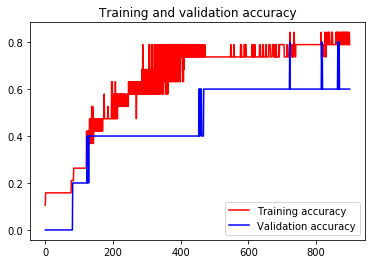

<Figure size 432x288 with 0 Axes>

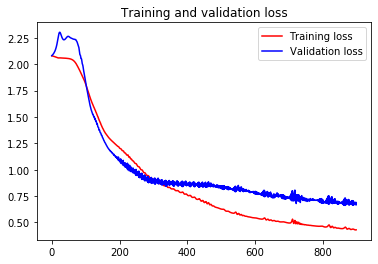

<Figure size 432x288 with 0 Axes>

In [105]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()